# Indeed 

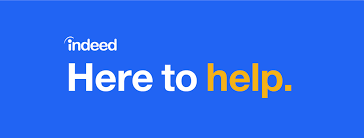

This data tells us about the different jobs provided by Indeed to people of Uk . It has columns like :
* Title : Position of the person in the company
* Location : Location of the company
* Company : Name of the company
* Salary : Salary of the person
* Description : Description of the person on Indeed

# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import nltk
from operator import itemgetter 
import wordcloud
plotly.offline.init_notebook_mode (connected = True)
plt.style.use('dark_background')

# Having a look at the data

In [ ]:
data=pd.read_csv('../input/data-science-job-market-in-uk/indeed-uk.csv')

In [ ]:
data.head()

# Checking for null values

In [ ]:
data.isna().sum()

From this we can clearly see that the Salary of the people is hidden in this data so we can remove this column from the data

In [ ]:
data.drop('Salary',axis=1,inplace=True)

In [ ]:
data.head()

# Top 10 Companies hiring people from Indeed in high numbers

In [ ]:
group=data.groupby('Company').count().sort_values('Title',ascending=False).iloc[:11]

In [ ]:
ax=sns.barplot(data=group,y=group.index,x=group['Title'])
ax.set(xlabel='Total Number')
ax

#### From this we can clearly see that Sainsbury DTD has been the number 1 company to be hiring people from Indeed followed by Apple and Vertex Pharmaceuticals :)

# Top 10 Most preffered Jobs for hiring on Indeed

In [ ]:
group2=data.groupby('Title').count().sort_values('Company',ascending=False)[:11]
ax2=sns.barplot(data=group2,y=group2.index.values,x='Company')
ax2.set(xlabel='Total Number')
ax2

#### We can clearly see that data scientist is the job most preffered by the companies to hire people for . This increasing demand is a lot due to the advent of big data, and the way data is being generated and consumed nowadays by companies. And, for businesses to collate and analyse this huge volume of data, they require data science professionals with specialised skills.

#### Most of the companies wants people who can do big data analysis for them due to increase in the amount of the data there is ....


# Top 10 locations which provides most opportunities as per the data

In [ ]:
location = data['Location'].value_counts().reset_index()
location.columns = ['Location', 'Observations']

fig = px.bar(location[:11], x = 'Observations', y = 'Location', orientation = 'h', color = 'Observations',
             color_continuous_scale = 'Blugrn', text = 'Observations', title = '<b>Top 10 locations with the higher oppotunities in UK</b>')
fig.show()

#### Most of the job oppotunities are provided in london  ....

#### We all know that london is the best place to start one's career  . It provide about a thirds of Uk's GDP and pulls a large about of economic pull from all around the world . London is also the home to variety of the industries  . 

#### So I'm not shocked by the findings of the above plot

# Let's have a closer look at Data scientists

In [ ]:
ds=pd.read_csv('../input/data-science-job-market-in-uk/data_scientist.csv')

In [ ]:
ds.head()

# Word Cloud For Data Science Titles

In [ ]:


plt.subplots(figsize=(12,8))
wordclouds = wordcloud.WordCloud(background_color='Black',
                      contour_color='White', contour_width=5, 
                      stopwords=stopwords,
                      width=1500, margin=10,
                      height=1080
                     ).generate(words)
plt.imshow(wordclouds)
plt.axis('off')
plt.show()

# Let's try to find out the highest frequency words from the data

In [ ]:
# Adding all the words in description into a sentence
words=' '.join(ds['Description'].fillna('').values)

# Lower all the words in the sentence
words=words.lower()

# Replacing all the punctuation and other characters with empty space
words_to_replace='[,.!*):(<]-'
for i in words_to_replace:
    words=words.replace(i,'')

# Getting the stopwords from nltk
stopwords = set(nltk.corpus.stopwords.words('english'))

# Removing the stopwords from the sentence and replacing them with the empty string character
sentence_without_stopwords=[]
for i in words.split(' '):
    if i not in stopwords:
        sentence_without_stopwords.append(i)



In [ ]:
# Making a function to find the frequency of the words
def frequency(sentence,number):
    dic={}
    for i in sentence:
        if i in dic:
            dic[i]+=1
        else:
            dic[i]=1
    res = dict(sorted(dic.items(), key = itemgetter(1), reverse = True)[:number])
    return res

In [ ]:
val=frequency(sentence_without_stopwords,21)
del val['']
datatt=pd.DataFrame(columns=['Words','Frequency'])
datatt['Words']=val.keys()
datatt['Frequency']=val.values()
fig = px.bar(datatt, x = 'Words', y = 'Frequency', title = '20 Most Frequent Words', 
             color = 'Frequency',  template = 'plotly_dark')
fig.show()


#### From this we can clearly see that the word which is the best usefull for your description when you are applying for the data scientist position is Data followed by learning team business and so on ....

# Having a look at Machine learning File Now :)

### Importing Ml data

In [ ]:
ml=pd.read_csv('../input/data-science-job-market-in-uk/ml.csv')
ml.head()

In [ ]:
# Adding all the words in description into a sentence
word=' '.join(ml['Description'].fillna('').values)

# Lower all the words in the sentence
word=words.lower()

# Replacing all the punctuation and other characters with empty space
word_to_replace='[,.!*):(<]-'
for i in word_to_replace:
    word=word.replace(i,'')

# Getting the stopwords from nltk
stopwords = set(nltk.corpus.stopwords.words('english'))

# Removing the stopwords from the sentence and replacing them with the empty string character
sentence_without_stopword=[]
for i in word.split(' '):
    if i not in stopwords:
        sentence_without_stopword.append(i)


In [ ]:
# Making a function to find the frequency of the words
def frequency(sentence,number):
    dic={}
    for i in sentence:
        if i in dic:
            dic[i]+=1
        else:
            dic[i]=1
    res = dict(sorted(dic.items(), key = itemgetter(1), reverse = True)[:number])
    return res

# Top 20 Frequecy Words Of Ml Dataset

In [ ]:
val=frequency(sentence_without_stopword,21)
del val['']
datat=pd.DataFrame(columns=['Words','Frequency'])
datat['Words']=val.keys()
datat['Frequency']=val.values()
fig = px.bar(datat, x = 'Words', y = 'Frequency', title = '20 Most Frequent Words In ML Dataset', 
             color = 'Frequency',  template = 'presentation')
fig.show()


#### Similar to the DS dataset we can see that the word data is real important when you are writing your description . Don't forget to write it :) 

#### Similarly word team is also important which shows that you can work really good in teams and have really work teamwork spirit . These type of characterisitcs really help getting the job .

# Let's look at similarities between ML and DS

In [ ]:
similar=[]
for i in sentence_without_stopword:
    if i in sentence_without_stopwords:
        similar.append(i)
ws=' '.join([i+' ' for i in similar])

In [ ]:


plt.subplots(figsize=(12,8))
wordclouda = wordcloud.WordCloud(background_color='orange',
                      contour_color='White', contour_width=5, 
                      stopwords=stopwords,
     
                     ).generate(ws)
plt.imshow(wordclouda)
plt.axis('off')
plt.show()

#### From this we can clearly see that the most important word in the description of either a DS or Ml is experience . It means that if you have an experience in the field you are applying in you have a really high chance of getting a job than if you don't have any experience .


# Hope ya all liked the file :)

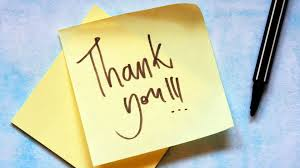